<a href="https://colab.research.google.com/github/kunalgaurav18/CE888/blob/main/Lab_8/TFLearn_FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip
!unzip data.zip

In [26]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
image_gen = ImageDataGenerator(rescale=1.0/255, 
                               rotation_range=20,
                               horizontal_flip=True, 
                               validation_split=0.1)

In [18]:
train = image_gen.flow_from_directory('./data/', target_size=(304,329),
                                      batch_size=4,subset='training')

val = image_gen.flow_from_directory('./data/', target_size=(304,329),
                                      batch_size=4,subset='validation')

Found 728 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [19]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

img_size = [304,329,3]

In [20]:
input = Input(shape = img_size)
model = Xception(input_tensor=input,)

In [21]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 304, 329, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 151, 164, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 151, 164, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 151, 164, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [23]:
last_layer = model.get_layer('block14_sepconv2_act').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='softmax', name='output')(x)
model = Model(input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 304, 329, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 151, 164, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 151, 164, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 151, 164, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics="accuracy")
my_callbacks = [
    EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='xception_model.h5', save_best_only=True),
]

model.fit(train, validation_data=val, epochs=50, callbacks=my_callbacks)

Epoch 1/50
182/182 [==============================] - 22s 111ms/step - loss: 2.9125 - accuracy: 0.8036 - val_loss: 2.7244e-04 - val_accuracy: 1.0000
Epoch 2/50
182/182 [==============================] - 20s 108ms/step - loss: 0.8161 - accuracy: 0.9577 - val_loss: 0.1413 - val_accuracy: 0.9875
Epoch 3/50
182/182 [==============================] - 19s 106ms/step - loss: 0.4072 - accuracy: 0.9595 - val_loss: 0.0341 - val_accuracy: 0.9875
Epoch 4/50
182/182 [==============================] - 19s 106ms/step - loss: 0.4236 - accuracy: 0.9827 - val_loss: 0.0699 - val_accuracy: 0.9875
Epoch 5/50
182/182 [==============================] - 20s 108ms/step - loss: 0.2190 - accuracy: 0.9866 - val_loss: 0.3314 - val_accuracy: 0.9750
Epoch 6/50
182/182 [==============================] - 19s 106ms/step - loss: 0.2837 - accuracy: 0.9882 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/50
182/182 [==============================] - 19s 106ms/step - loss: 0.3318 - accuracy: 0.9767 - val_loss: 0.6563 - va

In [27]:
history = pd.DataFrame(model.history.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,1.839797,0.888736,0.000272,1.0000
1,0.745245,0.960165,0.141345,0.9875
2,0.613646,0.968407,0.034061,0.9875
3,0.275991,0.986264,0.069895,0.9875
4,0.112217,0.989011,0.331419,0.9750


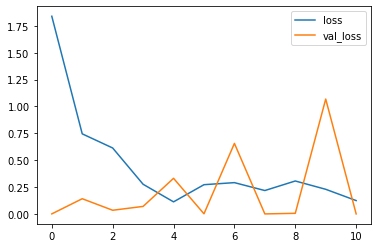

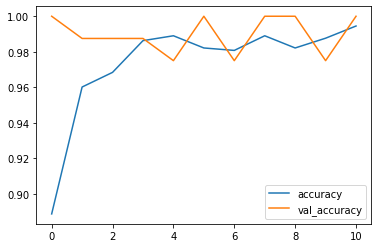

In [28]:
history[['loss', 'val_loss']].plot()
history[['accuracy','val_accuracy']].plot()